In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder


In [ ]:
# Load the dataset
df = pd.read_csv('/content/udemy_courses.csv')
df.head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200.0,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75.0,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45.0,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95.0,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200.0,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [ ]:
df.shape

(3678, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3676 non-null   float64
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3676 non-null   object 
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 319.8+ KB


In [ ]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3676.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.005169,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,60.980449,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [ ]:
print(df.isnull().sum())


course_id              0
course_title           0
url                    0
is_paid                0
price                  2
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                2
dtype: int64


# Handling Missing Values


In [ ]:
df['price'].fillna(df['price'].mean(), inplace=True)

<ipython-input-7-b062833ba6c0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].mean(), inplace=True)


In [ ]:
df['subject'].fillna(df['subject'].mode()[0], inplace=True)

<ipython-input-8-e6fd6e7c7d54>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['subject'].fillna(df['subject'].mode()[0], inplace=True)


In [ ]:
# Find duplicate rows
df.duplicated().sum()




np.int64(6)

In [ ]:
# Drop duplicates if needed
df.drop_duplicates(inplace=True)

Univariate Analysis

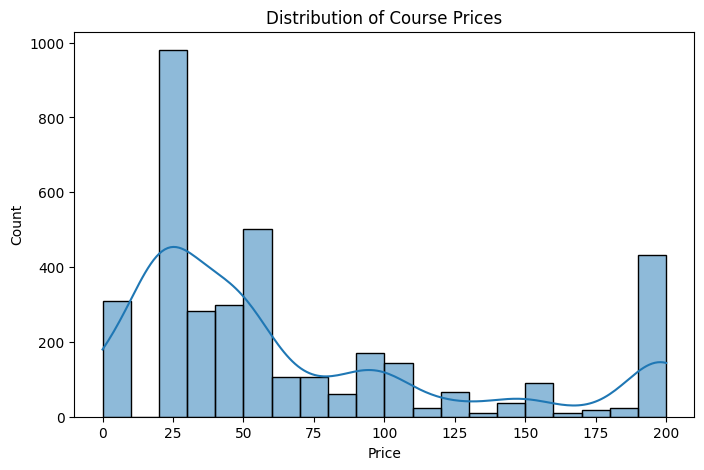

In [ ]:
#Distribution of Course Prices

plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=20, kde=True)
plt.title('Distribution of Course Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


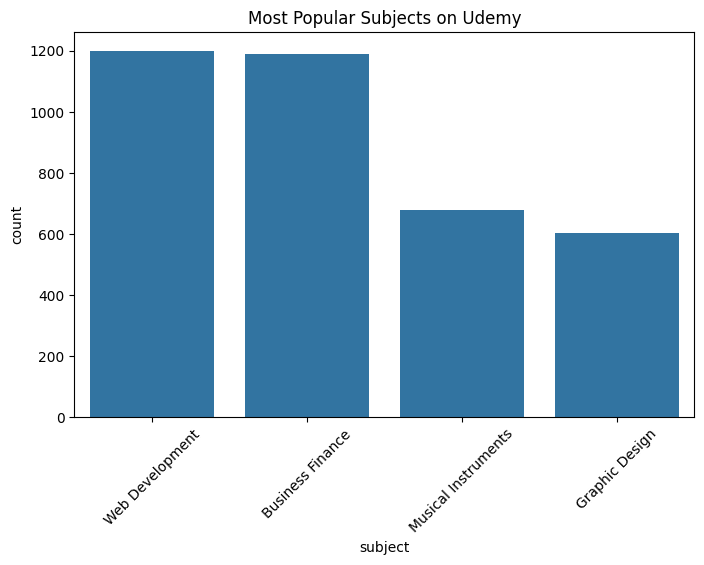

In [ ]:
#Most Popular Subjects

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='subject', order=df['subject'].value_counts().index)
plt.title('Most Popular Subjects on Udemy')
plt.xticks(rotation=45)
plt.show()

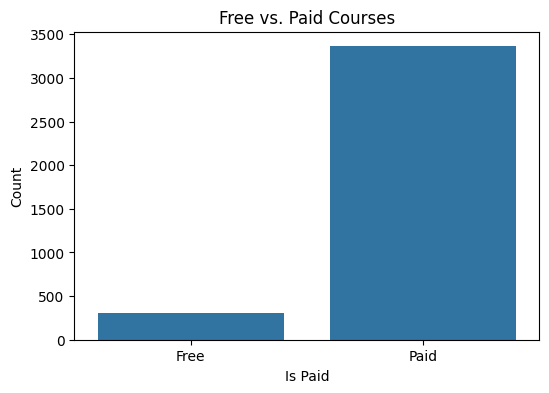

In [ ]:
#Free vs. Paid Courses

plt.figure(figsize=(6, 4))
sns.countplot(x=df['is_paid'])
plt.title('Free vs. Paid Courses')
plt.xlabel('Is Paid')
plt.ylabel('Count')
plt.xticks([0, 1], ['Free', 'Paid'])
plt.show()

Bivariate Analysis

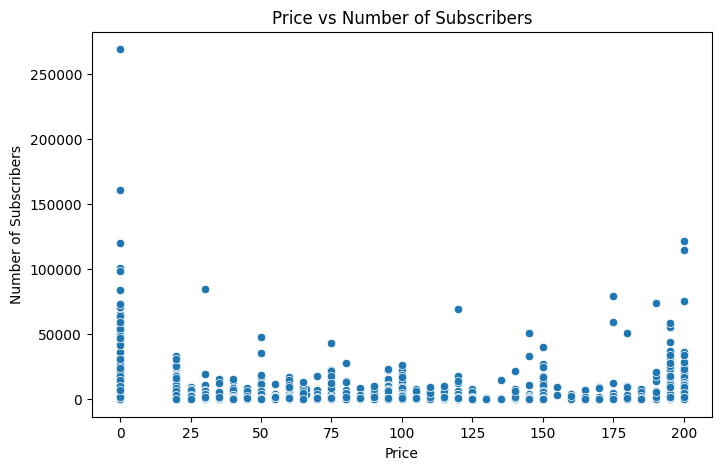

In [ ]:
#Relationship Between Price and Subscribers

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['price'], y=df['num_subscribers'])
plt.title('Price vs Number of Subscribers')
plt.xlabel('Price')
plt.ylabel('Number of Subscribers')
plt.show()

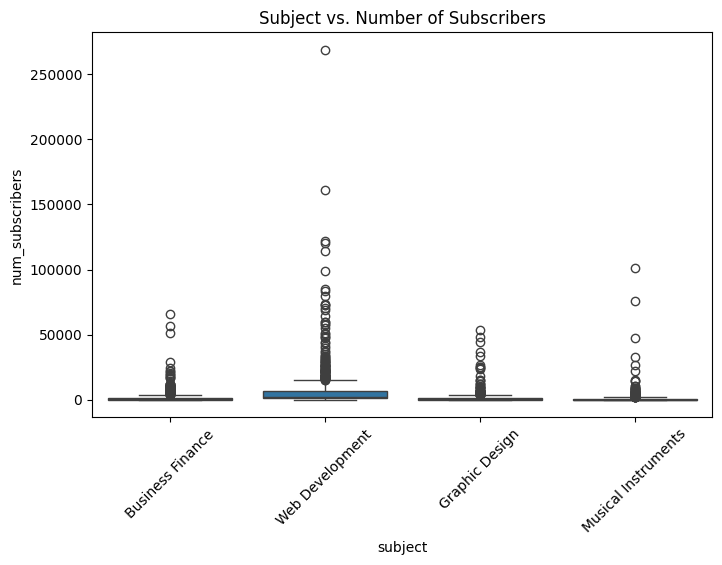

In [ ]:
#Subject vs. Number of Subscribers

plt.figure(figsize=(8, 5))
sns.boxplot(x='subject', y='num_subscribers', data=df)
plt.title('Subject vs. Number of Subscribers')
plt.xticks(rotation=45)
plt.show()

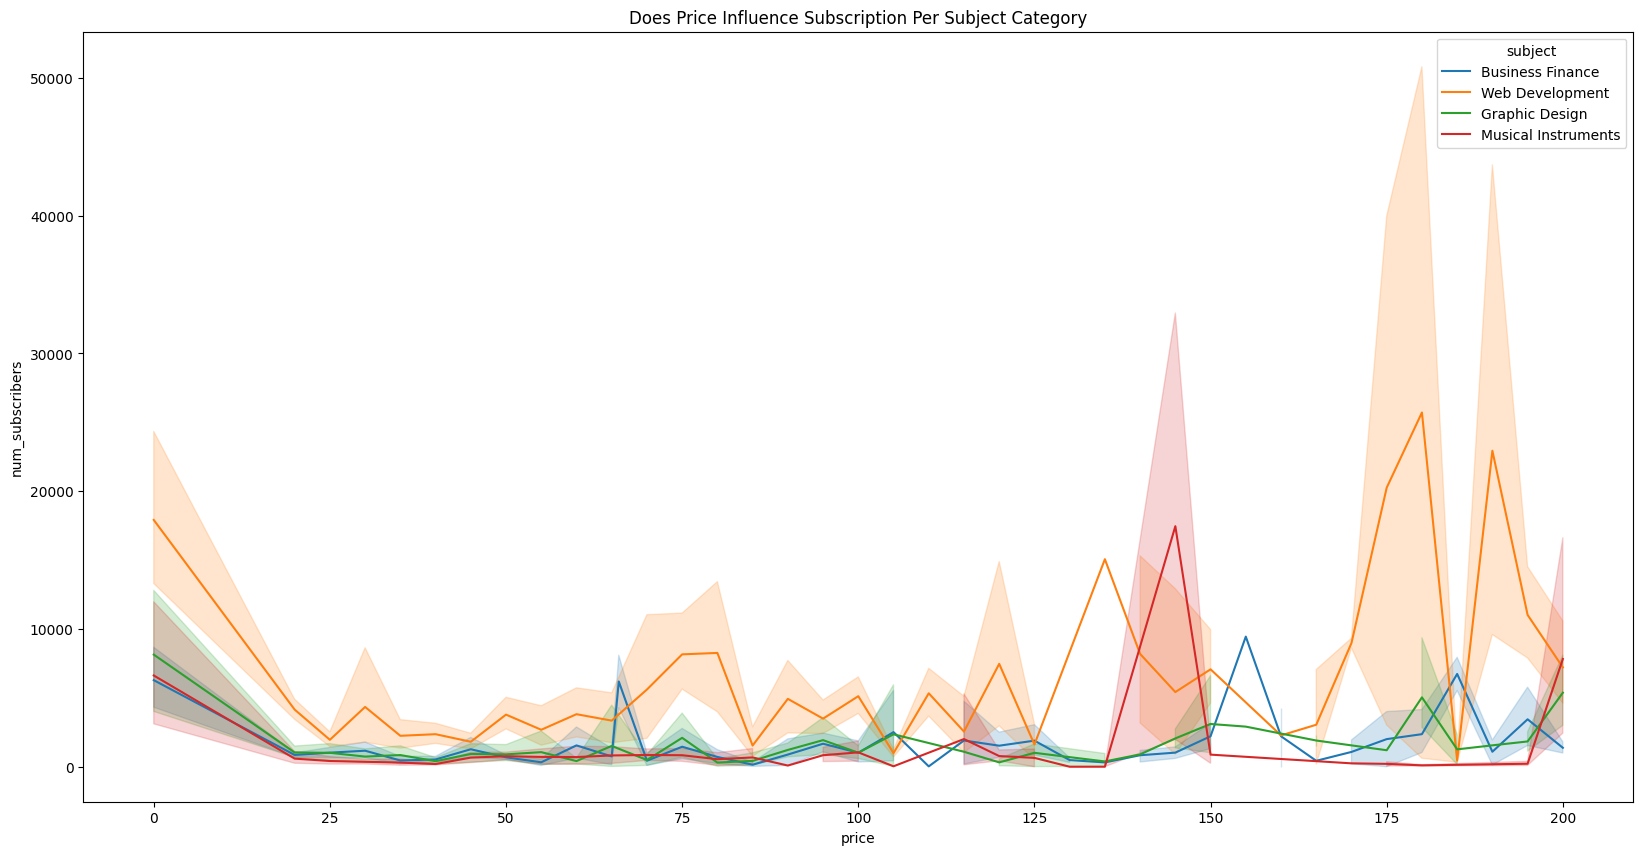

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Does Price Influence Subscription Per Subject Category")
sns.lineplot(data=df,x='price',y='num_subscribers',hue='subject')
plt.show()

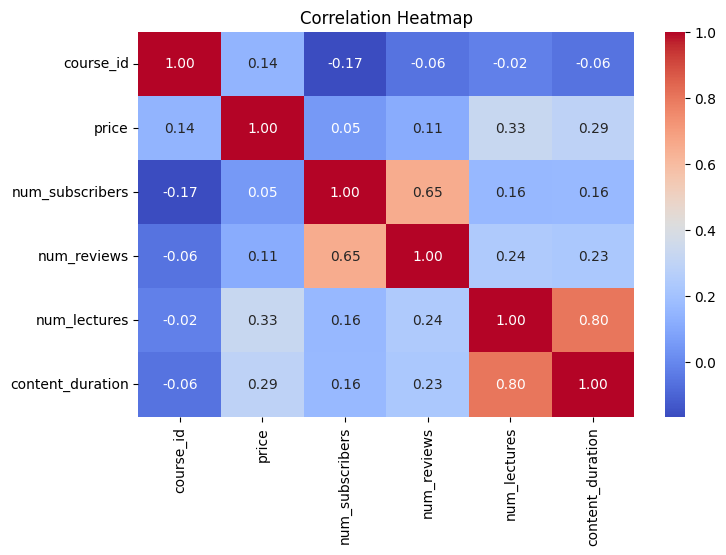

In [ ]:
#Correlation Matrix

numerical_features = df.select_dtypes(include=np.number)

plt.figure(figsize=(8, 5))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Convert date columns
date_columns = ['published_timestamp']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col])

In [ ]:
df.head(130)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200.0,2147,23,51,All Levels,1.50,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75.0,2792,923,274,All Levels,39.00,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45.0,2174,74,51,Intermediate Level,2.50,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95.0,2451,11,36,All Levels,3.00,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200.0,1276,45,26,Intermediate Level,2.00,2016-12-13 14:57:18+00:00,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
125,528784,Stock market Investing Encyclopedia: How to in...,https://www.udemy.com/stockmarket/,True,200.0,3143,11,39,Intermediate Level,3.00,2015-11-10 22:55:53+00:00,Business Finance
126,637430,Learn the basics of preparing accounting state...,https://www.udemy.com/basics-of-financial-acco...,True,20.0,1951,30,20,Intermediate Level,0.55,2015-10-13 21:07:22+00:00,Business Finance
127,236080,Elliott Wave -Forex Trading With The Elliott W...,https://www.udemy.com/forex-trading-with-the-e...,True,90.0,4022,35,14,Expert Level,1.00,2016-12-15 15:49:13+00:00,Business Finance
128,777444,Corporate Finance - A Brief Introduction,https://www.udemy.com/finance-a-brief-introduc...,False,0.0,11724,649,17,Beginner Level,1.50,2016-03-04 05:58:09+00:00,Business Finance


In [ ]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove("level")  # Exclude 'level' column

# Apply Label Encoding to the selected categorical columns
label_encoders = {}  # Dictionary to store encoders for later use

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Encode the column
    label_encoders[col] = le



In [ ]:
# Define the order of levels, ensure they match the actual values
level_order = [["All Levels", "Beginner Level", "Intermediate Level", "Expert Level"]]

# Apply Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=level_order)
df["level"] = ordinal_encoder.fit_transform(df[["level"]])

In [ ]:
df.head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,3406,3478,True,200.0,2147,23,51,0.0,1.5,2017-01-18 20:58:58+00:00,0
1,1113822,779,1451,True,75.0,2792,923,274,0.0,39.0,2017-03-09 16:34:20+00:00,0
2,1006314,1206,1231,True,45.0,2174,74,51,2.0,2.5,2016-12-19 19:26:30+00:00,0
3,1210588,444,790,True,95.0,2451,11,36,0.0,3.0,2017-05-30 20:07:24+00:00,0
4,1011058,1580,1648,True,200.0,1276,45,26,2.0,2.0,2016-12-13 14:57:18+00:00,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3672 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3672 non-null   int64              
 1   course_title         3672 non-null   int64              
 2   url                  3672 non-null   int64              
 3   is_paid              3672 non-null   bool               
 4   price                3672 non-null   float64            
 5   num_subscribers      3672 non-null   int64              
 6   num_reviews          3672 non-null   int64              
 7   num_lectures         3672 non-null   int64              
 8   level                3672 non-null   float64            
 9   content_duration     3672 non-null   float64            
 10  published_timestamp  3672 non-null   datetime64[ns, UTC]
 11  subject              3672 non-null   int64              
dtypes: bool(1), datetime64[ns

In [ ]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


In [ ]:
df.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,0.834271,0.930093,0.947426,True,1.000,0.007984,0.000838,0.065469,0.000000,0.019108,2017-01-18 20:58:58+00:00,0.0
1,0.867915,0.212725,0.395260,True,0.375,0.010382,0.033631,0.351733,0.000000,0.496815,2017-03-09 16:34:20+00:00,0.0
2,0.783512,0.329328,0.335331,True,0.225,0.008084,0.002696,0.065469,0.666667,0.031847,2016-12-19 19:26:30+00:00,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Apply Standard Scaling
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df.head()  # Check the transformed values


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1.151724,1.490686,1.549506,True,2.196276,-0.110004,-0.142483,0.215427,-0.831791,-0.428859,2017-01-18 20:58:58+00:00,-1.216708
1,1.276653,-0.993007,-0.362731,True,0.146615,-0.042015,0.819003,4.639132,-0.831791,5.762319,2017-03-09 16:34:20+00:00,-1.216708
2,0.963242,-0.589301,-0.570275,True,-0.345303,-0.107158,-0.087999,0.215427,1.842759,-0.263761,2016-12-19 19:26:30+00:00,-1.216708
3,1.558749,-1.309732,-0.986307,True,0.474561,-0.077959,-0.155303,-0.082131,-0.831791,-0.181212,2017-05-30 20:07:24+00:00,-1.216708
4,0.977072,-0.235703,-0.176884,True,2.196276,-0.201816,-0.118980,-0.280504,1.842759,-0.346310,2016-12-13 14:57:18+00:00,-1.216708


In [ ]:
df.head(1)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1.151724,1.490686,1.549506,True,2.196276,-0.110004,-0.142483,0.215427,-0.831791,-0.428859,2017-01-18 20:58:58+00:00,-1.216708
